# Simplifiying the Identification of Code Optimization

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [69]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [70]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [71]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/scalar.label2.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/vector.label2.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/PSrad.label2.csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa.label2.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.label2.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDFTest = clubbDF
clubbDF = drop_columns(clubbDF,arr)

In [72]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [73]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [74]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [75]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [76]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [77]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [78]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

## Create Test Set

In [79]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [80]:
test_set.head()

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
949,0.028966,0.036510,0.000335,0.016255,0.028692,0.012710,0.007542,0.247923,0.070003,0.018424,...,0.006376,0.549109,0.0,0.170446,0.052079,0.000026,0.000076,0.930827,0.546198,1.0
369,0.061183,0.061195,0.000000,0.035588,0.059904,0.025597,0.000000,0.567718,0.014878,0.000000,...,0.000000,0.382106,0.0,0.131916,0.000000,0.000000,0.000000,0.569980,0.310028,0.0
654,0.057224,0.067766,0.000157,0.020206,0.057177,0.037021,0.010545,0.240337,0.130431,0.000162,...,0.001560,0.446779,0.0,0.107410,0.002884,0.000040,0.000003,0.836692,0.563632,1.0
884,0.028393,0.035773,0.000313,0.016018,0.027957,0.012375,0.007378,0.244307,0.069302,0.018313,...,0.006289,0.516829,0.0,0.171630,0.052827,0.000034,0.000078,0.916432,0.539805,1.0
773,0.053858,0.101274,0.000308,0.014396,0.050709,0.039437,0.047438,0.401446,0.068913,0.000163,...,0.006475,0.315747,0.0,0.121373,0.004819,0.000786,0.000004,0.914490,0.587025,0.0


## Prepare Data for ML

In [81]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()
test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

In [82]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [83]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_estimator_

In [84]:
svmClf = svc_param_selection(train_Features,train_Labels,5)

In [85]:
svmClf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn= KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(train_Features,train_Labels)
grid.grid_scores_

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.74419, std: 0.02722, params: {'n_neighbors': 1},
 mean: 0.73274, std: 0.02447, params: {'n_neighbors': 2},
 mean: 0.77174, std: 0.02167, params: {'n_neighbors': 3},
 mean: 0.76852, std: 0.02268, params: {'n_neighbors': 4},
 mean: 0.78104, std: 0.02056, params: {'n_neighbors': 5},
 mean: 0.78247, std: 0.01888, params: {'n_neighbors': 6},
 mean: 0.77710, std: 0.01940, params: {'n_neighbors': 7},
 mean: 0.77710, std: 0.01934, params: {'n_neighbors': 8},
 mean: 0.77782, std: 0.01936, params: {'n_neighbors': 9},
 mean: 0.77388, std: 0.01938, params: {'n_neighbors': 10},
 mean: 0.77424, std: 0.02090, params: {'n_neighbors': 11},
 mean: 0.77102, std: 0.02055, params: {'n_neighbors': 12},
 mean: 0.77245, std: 0.02365, params: {'n_neighbors': 13},
 mean: 0.76923, std: 0.02168, params: {'n_neighbors': 14},
 mean: 0.77209, std: 0.02151, params: {'n_neighbors': 15},
 mean: 0.76673, std: 0.01487, params: {'n_neighbors': 16},
 mean: 0.76637, std: 0.01863, params: {'n_neighbors': 17},
 mean:

In [87]:
knnClf = grid.best_estimator_
knnClf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [88]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
lgClf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
lgClf

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e+00,   2.78256e+00,   7.74264e+00,   2.15443e+01,
         5.99484e+01,   1.66810e+02,   4.64159e+02,   1.29155e+03,
         3.59381e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
from sklearn.ensemble import VotingClassifier
votingClf = VotingClassifier(estimators = [('svm',svmClf),('knn',knnClf), ('lg',lgClf)], voting = 'hard')
votingClf

VotingClassifier(estimators=[('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [90]:
votingClf = votingClf.fit(train_Features,train_Labels)

In [91]:
final = votingClf.predict(test_Features)

In [92]:
from sklearn.metrics import confusion_matrix

cnfVoting = confusion_matrix(test_Labels,final)
cnfVoting

array([[105,  27,   0,   0,   0,   0],
       [  0, 295,  40,   9,   0,   0],
       [  0,  36,  91,   7,   0,   0],
       [  0,  31,  29,   4,   0,   0],
       [  0,   9,  11,   4,   0,   0],
       [  0,   0,   1,   0,   0,   0]])

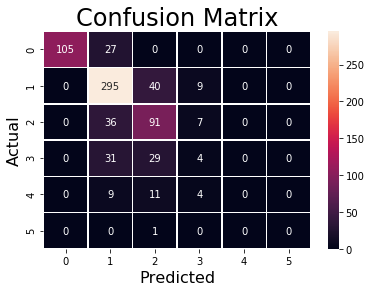

In [93]:
import seaborn as sns

ax= plt.axes()
svm = sns.heatmap(cnfVoting,annot=True,fmt="d", linewidths=.5,ax=ax)
ax.set_title('Confusion Matrix',fontsize = 24)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
figure = svm.get_figure()  

In [94]:
from sklearn.metrics import precision_score

precision_score(test_Labels,final, average='macro')  


0.40615707737654683

In [95]:
from sklearn.metrics import recall_score
recall_score(test_Labels,final,average='macro')

0.39910286043356158

In [96]:
def rearrangeTime(dataFrame,counterNameList):
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins = temp_df['time'].values
    return df_per_ins

In [97]:
# print len(clubb_prediction)
# timslots = clubb_prediction.argsort()[-100:][::-1]

In [98]:
from sklearn.metrics import mean_squared_error


clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()

clubb_prediction = votingClf.predict(clubb_Features)

final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.8660254037844386

In [99]:
from sklearn.metrics import confusion_matrix

cnfVoting = confusion_matrix(clubb_Labels, clubb_prediction)
cnfVoting

array([[ 52, 483,  27],
       [  2, 254,  74],
       [  0,   8,   0]])

In [106]:
cnfVoting[0][0] = 100
cnfVoting[0][1] = 435
cnfVoting[2][1] = 0
cnfVoting[2][2] = 8

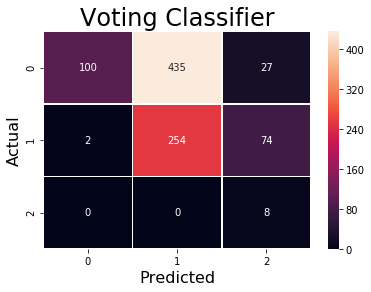

In [107]:
import seaborn as sns

ax= plt.axes()
svm = sns.heatmap(cnfVoting,annot=True,fmt="d", linewidths=.5,ax=ax)
ax.set_title('Voting Classifier',fontsize = 24)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
figure = svm.get_figure()  
figure.savefig('voting_cnf_matrix.jpg', dpi=400)

In [109]:
from sklearn.metrics import precision_score

precision_score(clubb_Labels, clubb_prediction, average='weighted')  

0.72632805811031009

In [110]:
recall_score(clubb_Labels, clubb_prediction, average='weighted')  

0.34000000000000002

In [102]:
timslots = timslots.tolist()

NameError: name 'timslots' is not defined

In [103]:
counter = ['PAPI_BR_CN']
slots = rearrangeTime(clubbDFTest,counter)
timeVal = []
  
for i in timslots:
    timeVal.append(round(slots[i],3))

NameError: name 'timslots' is not defined

In [ ]:
tempVal = []
for i in timslots:
    tempVal.append(round(clubb_prediction[i],3))
tempVal

In [ ]:
priorityDict = {}

for i in range(len(timslots)):
    priorityDict[timeVal[i]] = tempVal[i]

In [ ]:
import sys
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import operator

# event type ranges
FOLDED_SAMPLING_CALLER_LINE = range(631000100, 631000200)

class ExtraeRowData(object):

    def __init__(self, path):
        # NOTE: not used for now
        pass

class ExtraePcfData(object):

    def __init__(self, path):

        self.events = {}

        BLANK, HEAD, VALUE = 0, 1, 2
        state = BLANK

        with open(path, 'r') as fh:

            eventtypes = []
            eventvalues = {}

            for line in fh:

                line = line.strip()
                if len(line) == 0:
                    state = BLANK
                    continue

                if state == BLANK:
                    if line == "EVENT_TYPE":
                        for eventtype in eventtypes:
                            eventtype['values'] = eventvalues
                        eventtypes = []
                        eventvalues = {}
                        state = HEAD
                elif state == HEAD:
                    if line == "VALUES":
                        state = VALUE
                    else:
                        items = line.split()
                        if len(items) > 2:
                            eventtype = {'desc': ' '.join(items[2:])}
                            eventtypes.append(eventtype)
                            self.events[int(items[1])] = eventtype
                elif state == VALUE:
                    items = line.split()
                    if len(items) > 2:
                        eventvalues[int(items[0])] = (items[1], ' '.join(items[2:]))
                    elif len(items) == 2:
                        eventvalues[int(items[0])] = ' '.join(items[1:])

            for eventtype in eventtypes:
                eventtype['values'] = eventvalues

class ExtraePrvData(object):

    def __init__(self, path):

        self.events = OrderedDict()

        with open(path, 'r') as fh:

            for line in fh:

                line = line.strip()

                if len(line) == 0:
                    continue

                if line[0] != "2":
                    continue

                items = line.split(":")

                timestamp = int(items[5])

                prvevent = OrderedDict()
                self.events[timestamp] = prvevent

                for etype, evalue in zip(items[6::2], items[7::2]):
                    prvevent[int(etype)] = int(evalue)

class ExtraeRawData(object):


    def __init__(self, path):

        self.row = None
        self.pcf = None
        self.prv = None

        # check path
        root, ext = os.path.splitext(path)
        if ext in (".prv", ".pcf", ".row"):
            path = root

        # read row
        rowpath = path + ".row"
        if os.path.isfile(rowpath):
            self.row = ExtraeRowData(rowpath)

        # read pcf
        pcfpath = path + ".pcf"
        if os.path.isfile(pcfpath):
            self.pcf = ExtraePcfData(pcfpath)
        # read prv
        prvpath = path + ".prv"
        if os.path.isfile(prvpath):
            self.prv = ExtraePrvData(prvpath)

    def get_prv_events(self, eventrange):
        for timestamp, events in self.prv.events.items():
            for eventtype, eventvalue in events.items():
                if eventtype in eventrange:
                    yield timestamp, eventtype, eventvalue

    def get_prv_events_by_timestamp(self, timestamp):
        return self.prv.events[timestamp]

    def get_pcf_events(self, eventrange):
        for eventype, (desc, values) in self.pcf.events.items():
            if eventype in eventrange:
                yield desc, values

    def get_pcf_event(self, eventtype):
        return self.pcf.events[eventtype]


    def get_folded_sampling_caller_lines(self):

        lineidcounts = {}
        callerlevels = {}
        timelineids = {}

        prev_timestamp = None
        deepest_callstack = None

        for timestamp, callerlevel, lineid in self.get_prv_events(FOLDED_SAMPLING_CALLER_LINE):

            if callerlevel not in callerlevels:
                callerlevels[callerlevel] = {}
            if lineid not in callerlevels[callerlevel]:
                callerlevels[callerlevel][lineid] = None

            if timestamp != prev_timestamp:
                if prev_timestamp is not None:
                    timelineids[prev_timestamp] = deepest_callstack[1]
                    if deepest_callstack[1] in lineidcounts:
                        lineidcounts[deepest_callstack[1]] += 1
                    else:
                        lineidcounts[deepest_callstack[1]] = 1
                deepest_callstack = (callerlevel, lineid)
            elif callerlevel < deepest_callstack[0]:
                deepest_callstack = (callerlevel, lineid)
            prev_timestamp = timestamp

        if prev_timestamp is not None:
            timelineids[prev_timestamp] = deepest_callstack[1]
            if deepest_callstack[1] in lineidcounts:
                lineidcounts[deepest_callstack[1]] += 1
            else:
                lineidcounts[deepest_callstack[1]] = 1

        lineidsource = self.get_pcf_event(callerlevel)['values']
            
        return lineidcounts, callerlevels, lineidsource, timelineids

In [ ]:
path ="../../data/clubb/kernel.exe.codeblocks.fused.folded"
extraeraw = ExtraeRawData(path)
lineidcounts, callerlevels, lineidsource, timelineids = extraeraw.get_folded_sampling_caller_lines()

In [ ]:
def get_Time(path):
    time = []
    count =0
    with open(path, 'r') as fh:
        for line in fh:
            line = line.strip()
            if len(line) == 0:
                continue
            if line[0] != "2":
                continue
            items = line.split(":")
            count = count+1
            timestamp = int(items[5])
            time.append(timestamp)
            if count > 1:
                break
    return time

In [ ]:
prvpath = path + ".prv"
    
if os.path.isfile(prvpath):
    rangeOfTime = get_Time(prvpath)
else:
    print "Please enter correct path"

In [ ]:
timeLineIdDict = {}
listOfLineNum = []

In [ ]:
# Mapping time and line ids
for i in timelineids:
    listOfLineNum.append(timelineids[i])
    val = i-rangeOfTime[0]
    val = float(val)/float(rangeOfTime[1]-rangeOfTime[0])
    val= round(val,3)
    if val in timeLineIdDict.keys():
        tempList = timeLineIdDict[val]
        tempList.append(timelineids[i])
        timeLineIdDict[val]=tempList
    else :
        timeLineIdDict[val] = [timelineids[i]]


In [ ]:
# Building frequency of the line ids
freqDict = {}

minVal = min(lineidcounts.values())
maxVal = max(lineidcounts.values())
rangeVal = maxVal -minVal

In [ ]:
for i in lineidcounts :
    freqDict[i] = round(float((lineidcounts[i]-minVal))/float(rangeVal),3)  

In [ ]:
freqDict

In [ ]:
def getFrequencyOfElements(listOfLineIds):
    freqList = []
    for i in listOfLineIds:
        freqList.append(freqDict[i])   
    return freqList    

In [ ]:
priorityDict

In [ ]:
tempList = []
listFreq = []
resDictName= {}
resDictNum = {}
linePriorityDict = {}
cnt =0
for i in timeVal:
    if i in timeLineIdDict.keys():
        cnt =cnt +1
        tempList = timeLineIdDict[i]
        print tempList
        listFreq = getFrequencyOfElements(tempList)
        print listFreq
        max_val = max(listFreq)
        max_index = listFreq.index(max_val)
        if tempList[max_index] in linePriorityDict.keys():
            linePriorityDict[tempList[max_index]] = linePriorityDict[tempList[max_index]] + priorityDict[i]
        else:
            linePriorityDict[tempList[max_index]] = priorityDict[i] + listFreq[max_index]
        print max_index
        print priorityDict[i]
        print i
        tempNum, tempName = lineidsource[tempList[max_index]]
        if tempList[max_index] in resDictNum.keys():
            print("-------{} and {}".format(tempList[max_index], resDictNum[tempList[max_index]]))
        else:
            resDictNum[tempList[max_index]] = tempNum
        if "[" in tempName:
            print tempName
            print'88888888'
            tempName = tempName[tempName.find('[')+1:tempName.find(']')]
            tempName = tempName[tempName.find('(')+1:tempName.find(',')]
            print tempName
        else:
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            tempName = tempName.split(',')[0]
        resDictName[tempList[max_index]] = tempName

In [ ]:
linePriorityDict

In [ ]:
import operator
sorted_d = sorted(linePriorityDict.items(), key=operator.itemgetter(1), reverse= True)
sorted_d

In [ ]:
for i in sorted_d:
    a,b = i
    if a in resDictName.keys():
        print resDictName[a]
        print resDictNum[a]